In [2]:
import numpy as np
import matplotlib
import scipy.stats as sst
import scipy as sp
import matplotlib.pylab as plt
from ipywidgets import interact,Checkbox,Text,VBox

import scipy.spatial.distance as ssp
import random

In [3]:
dx = 100
dy = dx

A = np.random.normal(70, 15, size=(50,50))
vector_A = A.flatten()
# print (A)

i_coords, j_coords = np.meshgrid(range(A.shape[0]), range(A.shape[1]), indexing='ij')
coords = np.column_stack((np.concatenate(i_coords), np.concatenate(j_coords)))
index = np.arange(A.shape[0]*A.shape[1])

In [4]:
unique = random.sample(range(A.shape[0]*A.shape[1]), 150)
data=vector_A[unique]
#Normalization of data
data = (data-np.mean(data))/np.std(data)
len_data = len(data)

(array([0.04500862, 0.03375647, 0.14627802, 0.33756466, 0.46133837,
        0.30380819, 0.22504311, 0.09001724, 0.03375647, 0.01125216]),
 array([-2.77195717, -2.17947809, -1.58699901, -0.99451993, -0.40204085,
         0.19043823,  0.78291731,  1.37539639,  1.96787547,  2.56035455,
         3.15283363]),
 <a list of 10 Patch objects>)

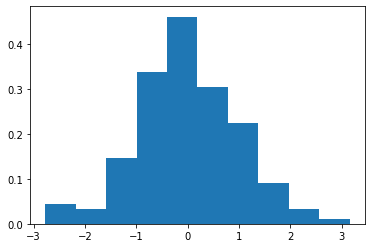

In [5]:
plt.hist(data, density=True)

(array([0.02666667, 0.04666667, 0.13333333, 0.33333333, 0.60666667,
        0.78666667, 0.92      , 0.97333333, 0.99333333, 1.        ]),
 array([-2.77195717, -2.17947809, -1.58699901, -0.99451993, -0.40204085,
         0.19043823,  0.78291731,  1.37539639,  1.96787547,  2.56035455,
         3.15283363]),
 <a list of 10 Patch objects>)

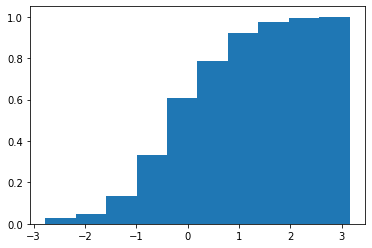

In [6]:
plt.hist(data, 
         density=True,
         cumulative=True)

In [7]:
#CORRECT!!!
coordinates_data = coords[unique]
print(coordinates_data)

[[24 10]
 [22 34]
 [48 35]
 [47 38]
 [10 35]
 [42 47]
 [47 12]
 [33  5]
 [45 19]
 [ 1 48]
 [47  0]
 [14 18]
 [ 5 32]
 [24 37]
 [10 14]
 [28 13]
 [ 2 36]
 [37 10]
 [18 48]
 [ 6  6]
 [ 1  0]
 [39 10]
 [16 32]
 [23  9]
 [ 1 19]
 [ 5 10]
 [48  8]
 [17  0]
 [31 42]
 [37 29]
 [22 13]
 [ 1 27]
 [45 32]
 [ 3 20]
 [ 8 14]
 [12  1]
 [25 33]
 [12 26]
 [ 2 35]
 [15  2]
 [19 41]
 [33  2]
 [48 32]
 [17  9]
 [12  8]
 [ 4 17]
 [ 4 30]
 [19 44]
 [13 36]
 [11 19]
 [37 45]
 [24 29]
 [33 32]
 [ 2 22]
 [26  9]
 [ 0 25]
 [30 43]
 [10 41]
 [20 18]
 [38 32]
 [20 12]
 [27 17]
 [19 46]
 [40 18]
 [38 48]
 [27 41]
 [45 48]
 [33  6]
 [ 1 18]
 [ 7  6]
 [25 25]
 [31 11]
 [48 42]
 [ 0 47]
 [25 26]
 [36 31]
 [24  1]
 [38  0]
 [16  7]
 [12 15]
 [31 21]
 [ 3 42]
 [17 29]
 [ 0 44]
 [17 30]
 [18 37]
 [34  6]
 [34 46]
 [11 42]
 [44  6]
 [34 33]
 [19 19]
 [41 29]
 [35 24]
 [33 21]
 [ 8  6]
 [37 28]
 [ 5 40]
 [18 38]
 [27 35]
 [ 3 49]
 [ 1 40]
 [49 47]
 [39 49]
 [ 7 10]
 [13 37]
 [ 8 11]
 [15  1]
 [19 37]
 [46 17]
 [27  4]
 

In [8]:
H = ssp.pdist(coordinates_data, metric='euclidean')
D = ssp.squareform(H)

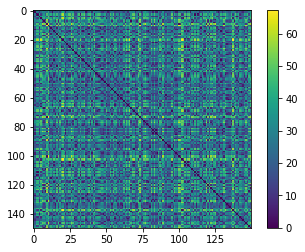

In [9]:
plt.imshow(D)
plt.colorbar()

Text(0.5, 1.0, 'Plan view')

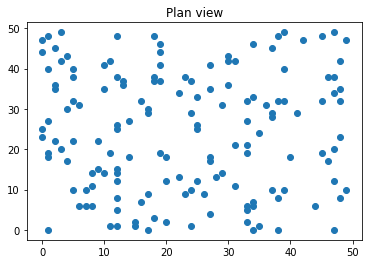

In [10]:
plt.scatter(coordinates_data[:,0], coordinates_data[:,1])
plt.title('Plan view')

In [11]:
var = np.zeros((len_data,len_data))
for i in range(len_data):
    for j in range(i, len_data):
        var[i,j] = (data[i] - data[j])**2.

Text(0, 0.5, 'variance')

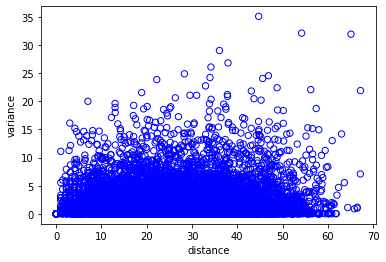

In [12]:
dists_ix = np.triu_indices(D.shape[0], 0)
dists_triu = D[dists_ix]

vars_ix = np.triu_indices(var.shape[0], 0)
vars_triu = var[vars_ix]

plt.scatter(dists_triu, vars_triu, s=40, facecolors='none', edgecolors='b')
plt.xlabel("distance")
plt.ylabel("variance")

In [13]:
bins = np.array([0.0, 250., 500., 1000., 2000., 3000., 4000., 5000., 6000.])

ixs = []    # for measurement values at point 0
ixs_h = []  # for measurement values at point 1
rs = []     # for rs in each bin
d_mean = [] # for mean distances

for cur_i in range(0, len(bins)-1):
    ix = np.where(np.logical_and(D>bins[cur_i], D<=bins[cur_i+1]))
    d_mean.append(D[ix].mean())
    F_0 = data[ix[0]]
    F_1 = data[ix[1]]
    r = np.corrcoef(F_0, F_1)[1,0]
    rs.append(r)
    ixs.append(F_0)
    ixs_h.append(F_1)  

C:\Users\saryz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\saryz\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\saryz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\saryz\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\saryz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\saryz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\saryz\Anaconda3\lib\site-packages\

In [16]:
np.max(D)

67.20863039818622

In [ ]:
plt.plot(d_mean, rs, 'o-')
plt.title('Correlogram')

In [ ]:
Z1, Z2 = np.meshgrid(data, data)
sem_var = (Z1-Z2)**2.


sem_vars = []
co_vars = []
for cur_i_bin, cur_bin in enumerate(bins[:-1]):
    ix = np.where(np.logical_and(D>bins[cur_i_bin], D<=bins[cur_i_bin+1]))
    
    ## do it via the prepared large matrices
    sem_var_cur = np.sum(sem_var[ix])/(2.0 * ix[0].shape[0])
    #print sem_var_cur
    sem_vars.append(sem_var_cur)
    
    mean = data[ix[1]].mean()
    covar = np.sum((data[ix[1]]-mean)* (data[ix[0]]-mean))/( ix[0].shape[0])
    co_vars.append(covar)

In [ ]:
# Plot Empirical Variogram
centers =  (bins[:-1] + bins[1:])/2
plt.scatter(centers, np.array(sem_vars), s=80)
plt.grid(True)
plt.xlabel('distance (h)')
plt.ylabel('$\gamma^{\star}$')
plt.xlim(0.0,)
plt.ylim(0.0,)

In [ ]:
import helpers.theo_variogram_fct as vario
import helpers.th_cov_func as nest_vario
# Define Dictionaries of Theoretical Variogram Models

# Dictionary for individual variogram models. Reference the theo_variogram_fct python file
models = {'Exponential': vario.ExponentialVariogram,
          'Spherical': vario.SphericalVariogram,
          'Gaussian': vario.GaussianVariogram,
          'Linear': vario.LinearVariogram}

# Dictionary for individual short-form variogram models to be used for composited variogram models
mods = {'Exp': vario.ExponentialVariogram,
        'Sph': vario.SphericalVariogram,
        'Gau': vario.GaussianVariogram,
        'Lin': vario.LinearVariogram}

In [ ]:
# plotting for function for individual models
def plot_varmodel(Sill, Range, Model):
    v_model = Model(Sill, Range, h)
    plt.plot(h,v_model, c='red') # Model Variogram
    plt.scatter(centers, np.array(sem_vars), s=80) # Empirical Variogram
    plt.xlabel('distance')
    plt.ylabel('$\\gamma$')
    plt.xlim(0.,max(h))
    plt.ylim(0.,)
    plt.grid(True)
    plt.show()

In [ ]:
# Determine first guess of sill and range from empirical variogram
var_sill = np.round(np.max(np.array(sem_vars)),decimals = -1)
h = np.linspace(0, max(centers),  int(max(centers)/10.))
var_range = np.round(np.max(np.array(centers)),decimals = -1)


In [ ]:
# Trigger Interactive Plot
import importlib
importlib.reload(vario)
interact(plot_varmodel,
         Sill =(var_sill/2,var_sill*2,1),
         Range = (0,max(h), max(h)/100),
         Model = models)

In [ ]:
#Montecarlo random path
index_to_simulate = np.delete(index, unique, axis=0)#Delete from the matrix the 'observed data'
seeds = [10] #Len define number of realizations
for i in seeds:#iteration in every realization 
    random.seed(i)
    path = random.randint(len(index_to_simulate),size=len(index_to_simulate))
    coord_order = coords[index_to_simulate[path]]
    
